# **DIMENSIONALITY REDUCTION**
## By: Ayush Adarsh
### Notebook no. : 6



## 1. Principal Component Analysis
* Unsupervised ML Method

[Link to YT Lectures](https://youtu.be/1V_M4JxygGk?si=YMoQnRX5BhiBXZYj)

**Note:** Watch all videos from Lecture: "*Representation Learning: Part 1*" to Lecture: "*Kernel PCA*".(total 9 lectures)


- **What is PCA?**  
  PCA is a dimensionality reduction technique that transforms a dataset into a set of orthogonal components, capturing the maximum variance in fewer dimensions.

- **What is its use?**  
  PCA is used to simplify data for visualization, reduce noise, speed up machine learning models, and uncover patterns in high-dimensional datasets.

- **Use in Computer Vision for Images:**  
  PCA is used in image compression, feature extraction, and pre-processing tasks, reducing the dimensionality while preserving critical information.

- **Intuition (1 line):**  
  PCA identifies the directions (principal components) in which data varies the most and projects the data onto these directions.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from PIL import Image

In [2]:
image_path = "Cat.jpg"
color_image = Image.open(image_path)
grayscale_image = color_image.convert("L")
image_array = np.array(grayscale_image)

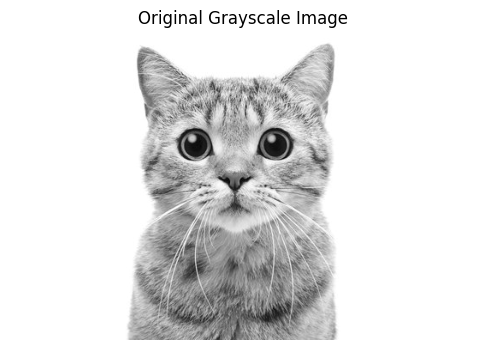

In [3]:
plt.figure(figsize=(6, 8))
plt.title("Original Grayscale Image")
plt.imshow(image_array, cmap='gray')
plt.axis('off')
plt.show()

In [4]:
image_flattened = image_array.reshape(-1, 360)
pca = PCA()
pca.fit(image_flattened)

PCA()

In [9]:
# Reconstruct the image using various numbers of principal components
k_values = [2,5,15,25, 50, 100, 200, 250]
reconstructed_images = []
for k in k_values:
    pca_k = PCA(n_components=k)
    transformed = pca_k.fit_transform(image_flattened)
    reconstructed = pca_k.inverse_transform(transformed)
    reconstructed_images.append(reconstructed.reshape(image_array.shape))

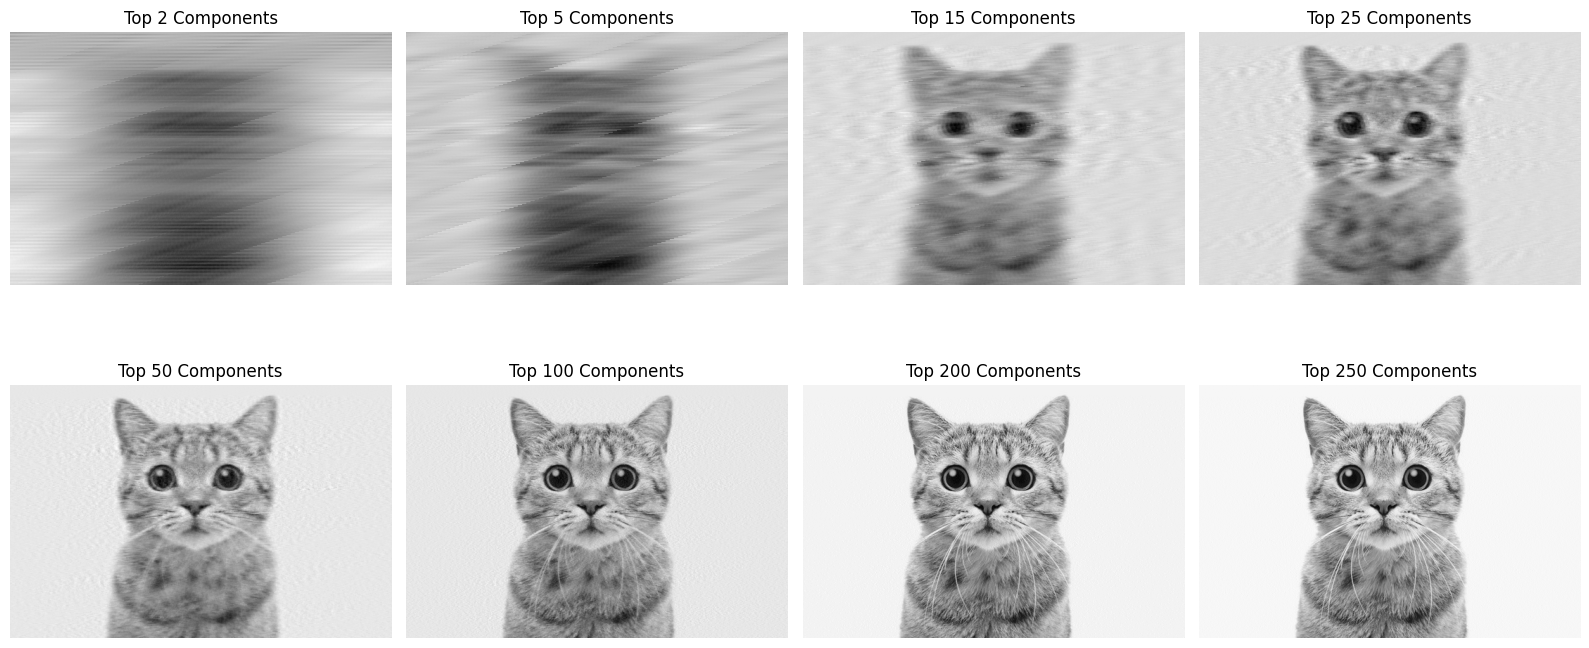

In [10]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
for ax, k, reconstructed in zip(axes.flat, k_values, reconstructed_images):
    ax.imshow(reconstructed, cmap='gray')
    ax.set_title(f"Top {k} Components")
    ax.axis('off')
plt.tight_layout()
plt.show()


### Conclusion
* Clearly Top-100 principal components are more than enough to capture meaningful information from the image.
* Dimensions have been reduced drastically

## **2. Linear Discriminant Analysis**
* Supervised ML Method

[Link to YT Lecture](https://youtu.be/wvz_aJA_mfs)

In [11]:
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [12]:
# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target
class_names = data.target_names

In [13]:
# Apply LDA
lda = LDA(n_components=2)  # Reduce to 2 dimensions for visualization
X_lda = lda.fit_transform(X, y)

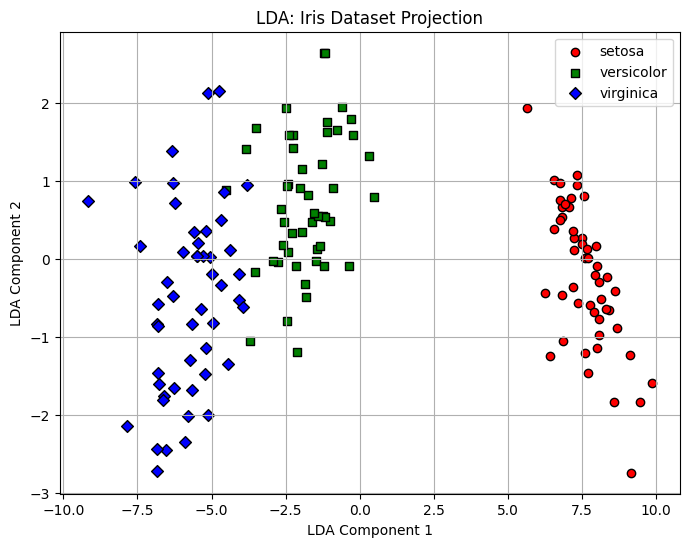

In [14]:
# Plot the LDA projection
plt.figure(figsize=(8, 6))
for label, color, marker in zip(np.unique(y), ['red', 'green', 'blue'], ['o', 's', 'D']):
    plt.scatter(X_lda[y == label, 0], X_lda[y == label, 1],
                label=class_names[label], c=color, marker=marker, edgecolor='k')

plt.title("LDA: Iris Dataset Projection")
plt.xlabel("LDA Component 1")
plt.ylabel("LDA Component 2")
plt.legend()
plt.grid()
plt.show()